In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt


#Visualizations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


# ML Matrix + Performance params
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

#Fixing Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.pipeline import Pipeline


#Load the ML Algos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.cluster import DBSCAN

# Geospatial
import contextily as cx
from shapely.geometry import Point, Polygon
import xarray as xr
import rasterio.features
import rasterio as rio
import fsspec

# API
import requests
import json

# Import Planetary Computer
# import stackstac
import pystac
import pystac_client
import planetary_computer

# Other
import os
from itertools import cycle

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\xarray\backends\cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [2]:
df1 = pd.read_csv('Level_1_challenge_1_submission_template.csv')

In [3]:
df1.head()

,id,decimalLatitude,decimalLongitude,occurrenceStatus
0,0,-37.917146,145.207706,NaN
1,1,-37.750974,144.981501,NaN
2,2,-37.961600,145.348000,NaN
3,3,-37.621300,145.003000,NaN
4,4,-38.498100,145.647000,NaN


In [4]:
df1.decimalLatitude.max()

-16.7442

In [5]:
df1.iloc[:,1:3]

,decimalLatitude,decimalLongitude
0,-37.917146,145.207706
1,-37.750974,144.981501
2,-37.961600,145.348000
3,-37.621300,145.003000
4,-38.498100,145.647000
...,...,...
4046,-31.884385,116.150192
4047,-32.412962,115.779737
4048,-32.147959,115.856628
4049,-31.827000,116.238000


In [6]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(df1.iloc[:,1:3])

DBSCAN(eps=2, min_samples=10)

In [7]:
dbscan.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [8]:
data_dbscan = df1.iloc[:,1:3].copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()

0    1491
1    1171
2     663
4     598
3     128
Name: clusters_dbscan, dtype: int64

In [9]:
data_dbscan

,decimalLatitude,decimalLongitude,clusters_dbscan
0,-37.917146,145.207706,0
1,-37.750974,144.981501,0
2,-37.961600,145.348000,0
3,-37.621300,145.003000,0
4,-38.498100,145.647000,0
...,...,...,...
4046,-31.884385,116.150192,4
4047,-32.412962,115.779737,4
4048,-32.147959,115.856628,4
4049,-31.827000,116.238000,4


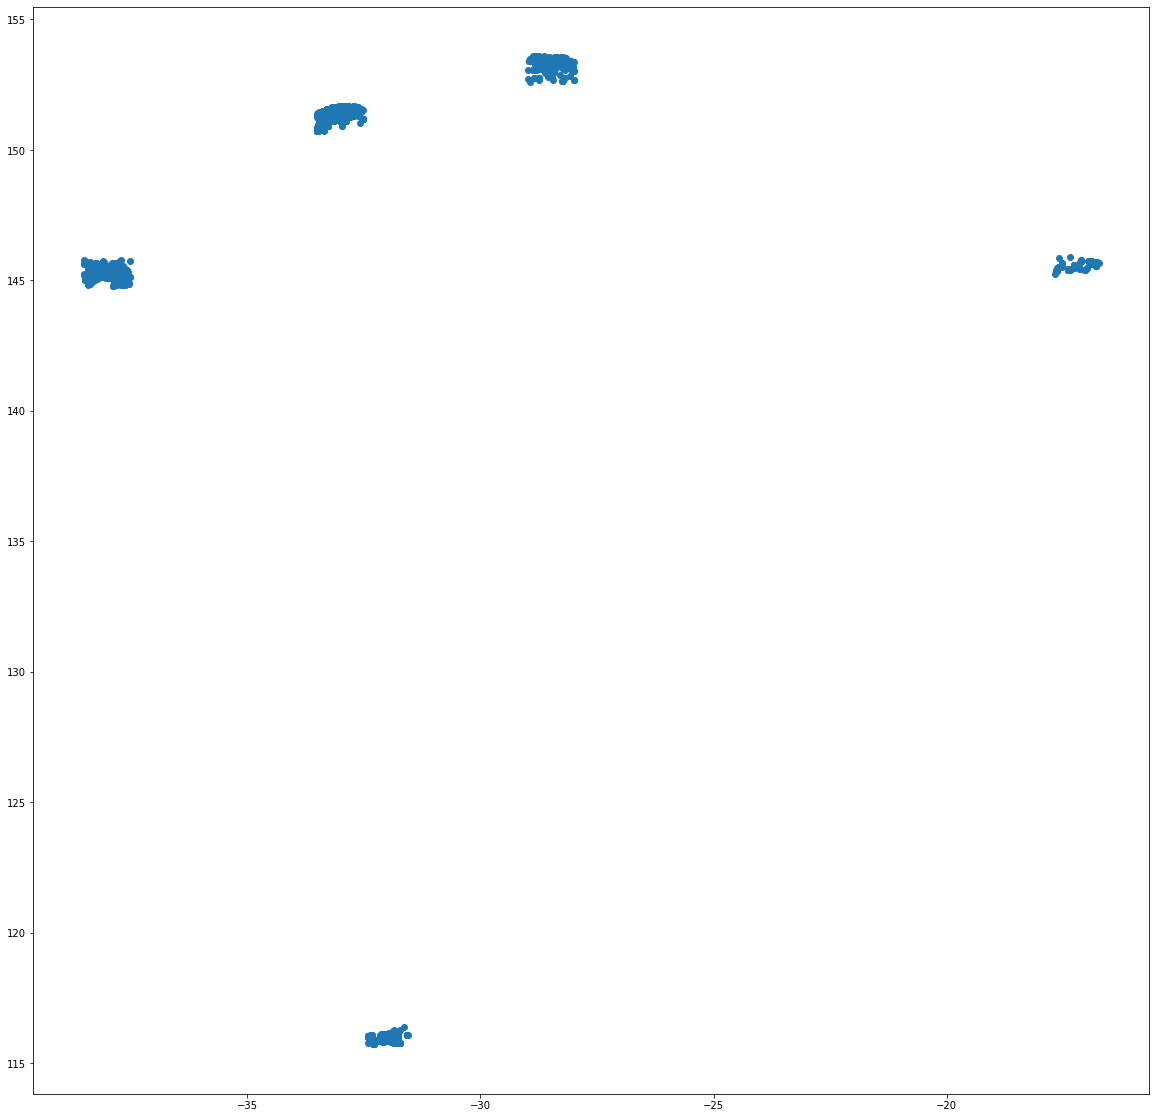

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.scatter(df1.decimalLatitude,df1.decimalLongitude)

In [11]:
data_dbscan.clusters_dbscan.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
d = 9

print(f'The age of my car is {d}')

The age of my car is 9


In [13]:
def plot_bbox_cluster(data):
    bbox_dict = {}
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    plt.scatter(data.decimalLatitude,data.decimalLongitude)
    #{clusterno:[min_lon,min_lat,max_lon, max_lat]}
    for x in list(data.clusters_dbscan.unique()):
        cluster_temp = data_dbscan.loc[data_dbscan.clusters_dbscan == x].copy()
        max_lat = cluster_temp.decimalLatitude.max()
        min_lat = cluster_temp.decimalLatitude.min()
        max_lon = cluster_temp.decimalLongitude.max()
        min_lon = cluster_temp.decimalLongitude.min()
        bbox_dict[f'{x}']=(min_lon,min_lat,max_lon, max_lat)
        left, bottom, width, height = (min_lat-0.25, min_lon-0.25, (max_lat-min_lat)+0.5, (max_lon-min_lon)+0.5)
        rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.5,
                       facecolor="red")
        plt.gca().add_patch(rect)
        
    plt.show()
    return bbox_dict

        
    
    

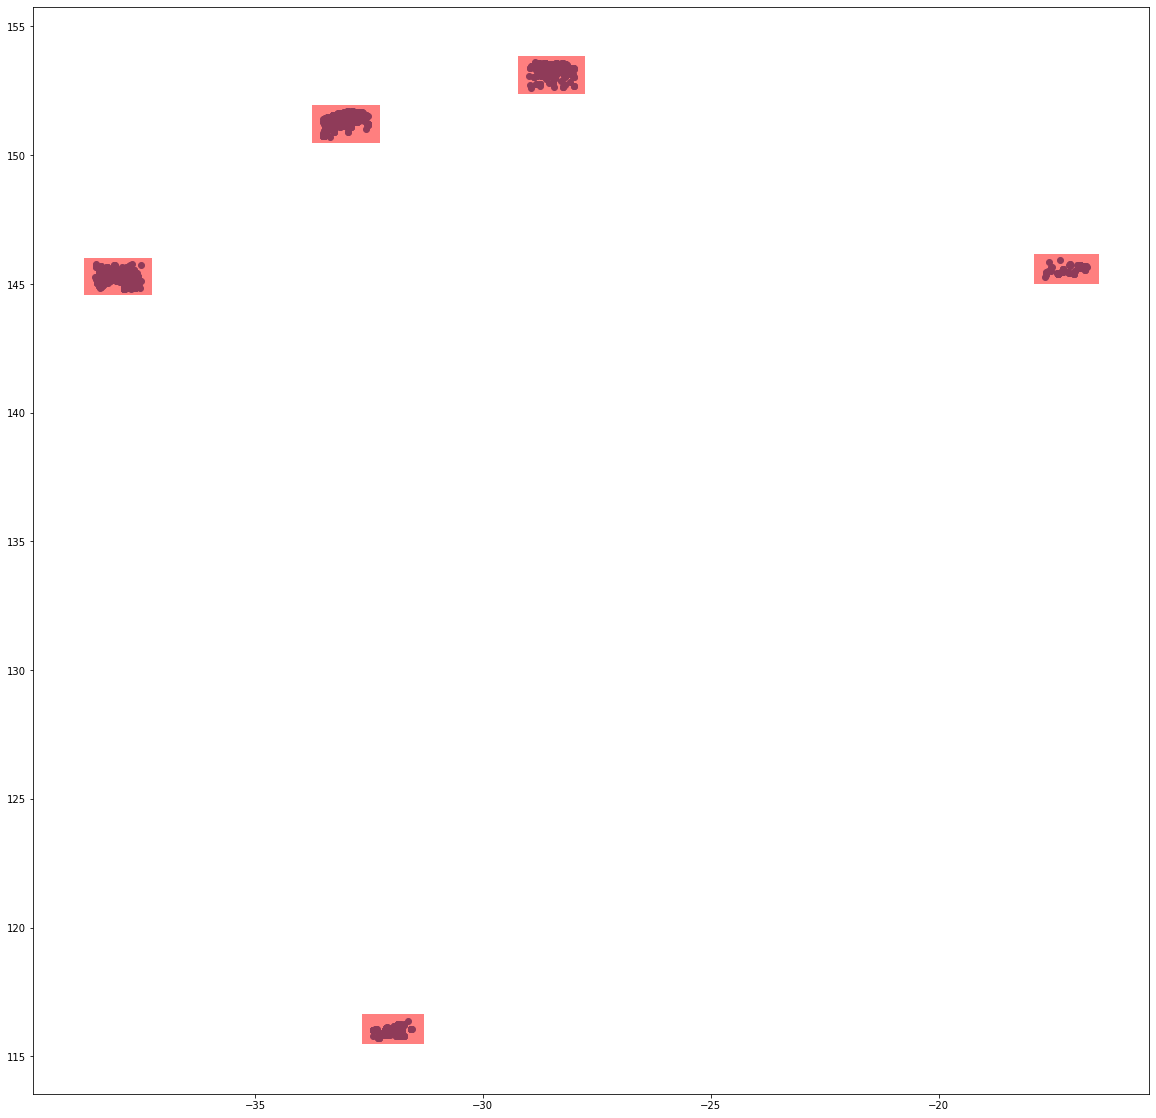

In [14]:
bbox_coordinates = plot_bbox_cluster(data_dbscan)

In [15]:
list(bbox_coordinates.values())[:-1]

[(144.800515, -38.49989934, 145.7671922, -37.51085308),
 (150.71, -33.49989273, 151.6999572, -32.51836843),
 (152.61, -28.99, 153.6, -28.00067739),
 (145.2511412, -17.67161479, 145.911, -16.7442)]

In [16]:
for x in bbox_coordinates:
    print(bbox_coordinates[x])

(144.800515, -38.49989934, 145.7671922, -37.51085308)
(150.71, -33.49989273, 151.6999572, -32.51836843)
(152.61, -28.99, 153.6, -28.00067739)
(145.2511412, -17.67161479, 145.911, -16.7442)
(115.7160036, -32.41296172, 116.3773691, -31.5516)


In [17]:
bbox_coordinates.pop('4')
bbox_coordinates

{'0': (144.800515, -38.49989934, 145.7671922, -37.51085308),
 '1': (150.71, -33.49989273, 151.6999572, -32.51836843),
 '2': (152.61, -28.99, 153.6, -28.00067739),
 '3': (145.2511412, -17.67161479, 145.911, -16.7442)}

In [18]:
def filter_bbox(frogs, bbox_clusters):
    frogs_fnl = pd.DataFrame()
    for y in bbox_clusters:
        frogs_temp = frogs[lambda x: 
            (x.decimalLongitude >= bbox_clusters[y][0]) &
            (x.decimalLatitude >= bbox_clusters[y][1]) &
            (x.decimalLongitude <= bbox_clusters[y][2]) &
            (x.decimalLatitude <= bbox_clusters[y][3])    ]
        frogs_temp.cluster = y
        frogs_fnl = pd.concat([frogs_fnl,frogs_temp])
    return frogs_fnl

def get_frogs(file, year_range=None, bbox_clusters=None):
    """Returns the dataframe of all frog occurrences for the bounding box specified."""
    columns = [
        'gbifID','eventDate','country','continent','stateProvince',
        'decimalLatitude','decimalLongitude','species'
    ]
    country_names = {
        'AU':'Australia', 'CR':'Costa Rica', 'ZA':'South Africa','MX':'Mexico','HN':'Honduras',
        'MZ':'Mozambique','BW':'Botswana','MW':'Malawi','CO':'Colombia','PA':'Panama','NI':'Nicaragua',
        'BZ':'Belize','ZW':'Zimbabwe','SZ':'Eswatini','ZM':'Zambia','GT':'Guatemala','LS':'Lesotho',
        'SV':'El Salvador', 'AO':'Angola', np.nan:'unknown or invalid'
    }
    continent_names = {
        'AU':'Australia', 'CR':'Central America', 'ZA':'Africa','MX':'Central America','HN':'Central America',
        'MZ':'Africa','BW':'Africa','MW':'Africa','CO':'Central America','PA':'Central America',
        'NI':'Central America','BZ':'Central America','ZW':'Africa','SZ':'Africa','ZM':'Africa',
        'GT':'Central America','LS':'Africa','SV':'Central America','AO':'Africa', np.nan:'unknown or invalid' 
    }
    frogs = (
        pd.read_csv('occurrence.txt', sep='\t', parse_dates=['eventDate'])
        .assign(
            country =  lambda x: x.countryCode.map(country_names),
            continent =  lambda x: x.countryCode.map(continent_names),
            species = lambda x: x.species.str.title()
        )
        [columns]
    )
    
    frogs['cluster'] = np.nan
    
    if year_range is not None:
        frogs = frogs[lambda x: 
            (x.eventDate.dt.year >= year_range[0]) & 
            (x.eventDate.dt.year <= year_range[1])
        ]
    if bbox_clusters is not None:
        frogs = filter_bbox(frogs, bbox_clusters)
    return frogs

In [19]:
# Load in data
all_frog_data = get_frogs('occurrence.txt', year_range=(2010, 2022), bbox_clusters=bbox_coordinates)
all_frog_data

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (2,9,35,39,42,46,47,48,54,56,57,58,59,60,62,64,65,66,68,69,70,71,74,75,76,77,78,79,82,84,85,86,87,88,89,90,92,96,97,99,101,103,109,110,111,114,115,116,117,118,119,120,121,122,123,126,127,128,129,130,135,136,142,143,145,147,148,149,150,151,161,165,170,172,173,174,175,176,177,178,179,180,181,185,189,190,191,192,193,195,207,210,212,215,217,225,226,242,246,254,255) have mixed types.Specify dtype option on import or set low_memory=False.
  
C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,cluster
2780,1633803922,2017-08-05 20:51:00,Australia,Australia,Victoria,-38.045122,145.326047,Crinia Signifera,0
3279,3384896595,2021-10-07 07:58:39,Australia,Australia,Victoria,-38.030947,145.432053,Crinia Signifera,0
4737,3463456338,2018-11-09 00:00:00,Australia,Australia,Victoria,-38.088716,145.722909,Crinia Signifera,0
4780,3463456499,2019-07-30 00:00:00,Australia,Australia,Victoria,-37.807553,145.263607,Crinia Signifera,0
4787,3463456516,2020-08-23 00:00:00,Australia,Australia,Victoria,-37.991842,145.118825,Crinia Signifera,0
...,...,...,...,...,...,...,...,...,...
173950,1654535586,2012-01-16 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Litoria Fallax,3
173951,1666889485,2014-12-04 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Austrochaperina Pluvialis,3
173963,1666888606,2014-01-29 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Austrochaperina Pluvialis,3
173999,1654535701,2010-09-28 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Austrochaperina Pluvialis,3


In [20]:
all_frog_data.cluster.value_counts()

1    13818
0     5716
2     2463
3     1212
Name: cluster, dtype: int64

In [21]:
all_frog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23209 entries, 2780 to 175614
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gbifID            23209 non-null  int64         
 1   eventDate         23209 non-null  datetime64[ns]
 2   country           23209 non-null  object        
 3   continent         23209 non-null  object        
 4   stateProvince     23209 non-null  object        
 5   decimalLatitude   23209 non-null  float64       
 6   decimalLongitude  23209 non-null  float64       
 7   species           23209 non-null  object        
 8   cluster           23209 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [22]:
all_frog_data.species.value_counts() #Class imbalance exits

Crinia Signifera             12850
Litoria Fallax               10179
Austrochaperina Pluvialis      180
Name: species, dtype: int64

In [23]:
target_species = 'Litoria Fallax'

all_frog_data = (
    all_frog_data
    # Assign the occurrenceStatus to 1 for the target species and 0 for all other species.
    # as well as a key for joining (later)
    .reset_index(drop=True).assign(
        occurrenceStatus = lambda x: np.where(x.species == target_species, 1, 0),
        key= lambda x: x.index
    )
)
all_frog_data

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,cluster,occurrenceStatus,key
0,1633803922,2017-08-05 20:51:00,Australia,Australia,Victoria,-38.045122,145.326047,Crinia Signifera,0,0,0
1,3384896595,2021-10-07 07:58:39,Australia,Australia,Victoria,-38.030947,145.432053,Crinia Signifera,0,0,1
2,3463456338,2018-11-09 00:00:00,Australia,Australia,Victoria,-38.088716,145.722909,Crinia Signifera,0,0,2
3,3463456499,2019-07-30 00:00:00,Australia,Australia,Victoria,-37.807553,145.263607,Crinia Signifera,0,0,3
4,3463456516,2020-08-23 00:00:00,Australia,Australia,Victoria,-37.991842,145.118825,Crinia Signifera,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
23204,1654535586,2012-01-16 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Litoria Fallax,3,1,23204
23205,1666889485,2014-12-04 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Austrochaperina Pluvialis,3,0,23205
23206,1666888606,2014-01-29 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Austrochaperina Pluvialis,3,0,23206
23207,1654535701,2010-09-28 00:00:00,Australia,Australia,Queensland,-16.805517,145.636068,Austrochaperina Pluvialis,3,0,23207


In [24]:
all_frog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23209 entries, 0 to 23208
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gbifID            23209 non-null  int64         
 1   eventDate         23209 non-null  datetime64[ns]
 2   country           23209 non-null  object        
 3   continent         23209 non-null  object        
 4   stateProvince     23209 non-null  object        
 5   decimalLatitude   23209 non-null  float64       
 6   decimalLongitude  23209 non-null  float64       
 7   species           23209 non-null  object        
 8   cluster           23209 non-null  object        
 9   occurrenceStatus  23209 non-null  int32         
 10  key               23209 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 1.9+ MB


In [25]:
len(all_frog_data.key.unique())

23209

In [26]:
all_frog_data.occurrenceStatus.value_counts()

0    13030
1    10179
Name: occurrenceStatus, dtype: int64

In [27]:
all_frog_data["Year"] = all_frog_data.eventDate.dt.year

In [28]:
all_frog_data.groupby('Year').count()

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,cluster,occurrenceStatus,key
Year,,,,,,,,,,,
2010,266,266,266,266,266,266,266,266,266,266,266
2011,263,263,263,263,263,263,263,263,263,263,263
2012,221,221,221,221,221,221,221,221,221,221,221
2013,432,432,432,432,432,432,432,432,432,432,432
2014,306,306,306,306,306,306,306,306,306,306,306
2015,578,578,578,578,578,578,578,578,578,578,578
2016,283,283,283,283,283,283,283,283,283,283,283
2017,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
2018,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197


In [29]:
frog_trend = all_frog_data.groupby('Year').count()['occurrenceStatus'].copy()

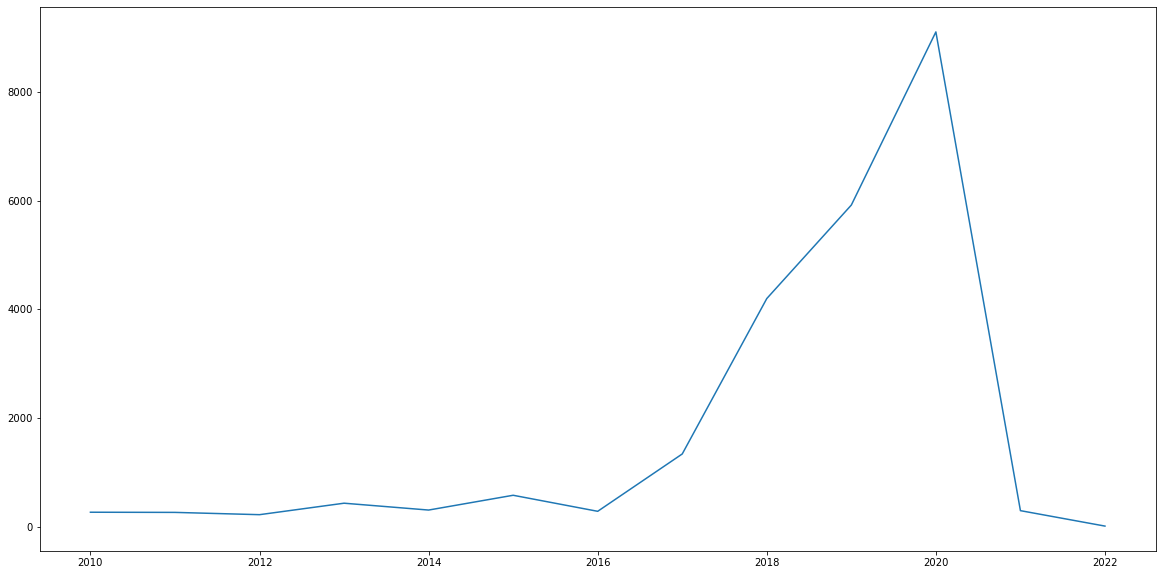

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(frog_trend)

Text(0.5, 1.0, 'Training set for Aus')

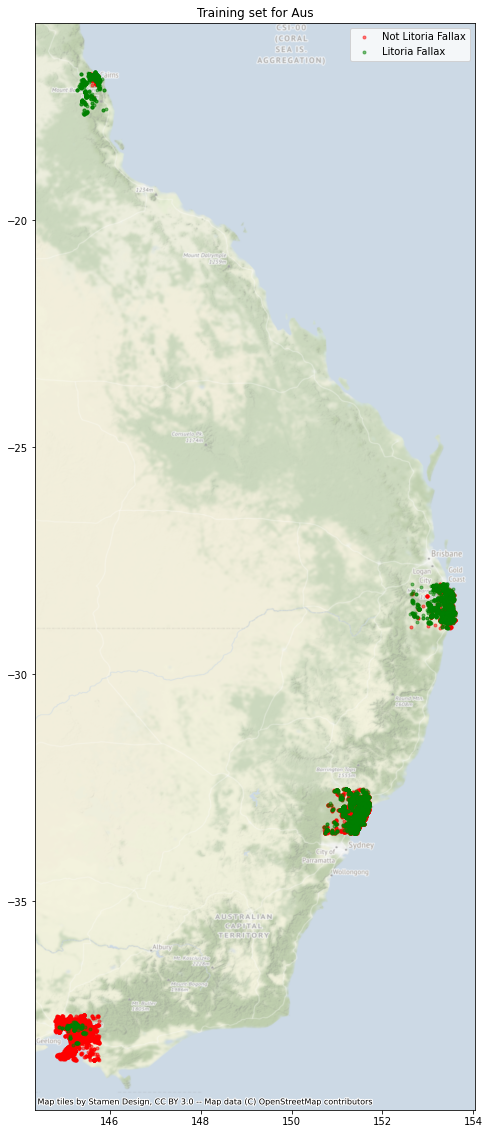

In [31]:
fig, ax = plt.subplots(figsize = (20, 20))

filt = all_frog_data.occurrenceStatus == 1
ax.scatter(all_frog_data[~filt].decimalLongitude, all_frog_data[~filt].decimalLatitude,
           color = 'red', marker='.', alpha=0.5, label=f"Not {target_species}")
ax.scatter(all_frog_data[filt].decimalLongitude, all_frog_data[filt].decimalLatitude,
           color = 'green', marker='.', alpha=0.5, label=target_species)
ax.legend()
cx.add_basemap(ax, crs={'init':'epsg:4326'}, alpha=0.5)
ax.set_title(f"Training set for Aus")

In [32]:
for x in bbox_coordinates.values():
    print(x)

(144.800515, -38.49989934, 145.7671922, -37.51085308)
(150.71, -33.49989273, 151.6999572, -32.51836843)
(152.61, -28.99, 153.6, -28.00067739)
(145.2511412, -17.67161479, 145.911, -16.7442)


In [33]:
all_frog_data.columns


Index(['gbifID', 'eventDate', 'country', 'continent', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'species', 'cluster',
       'occurrenceStatus', 'key', 'Year'],
      dtype='object')

In [34]:
all_frog_data.groupby(['cluster','occurrenceStatus']).count()['key']

'13,030'
'10,179'

'10,179'

In [35]:
all_frog_data.loc[all_frog_data.cluster.isin(['0','1','2','3'])][[ 'decimalLatitude', 'decimalLongitude','cluster']]

,decimalLatitude,decimalLongitude,cluster
0,-38.045122,145.326047,0
1,-38.030947,145.432053,0
2,-38.088716,145.722909,0
3,-37.807553,145.263607,0
4,-37.991842,145.118825,0
...,...,...,...
23204,-16.805517,145.636068,3
23205,-16.805517,145.636068,3
23206,-16.805517,145.636068,3
23207,-16.805517,145.636068,3


In [36]:


X_balance = all_frog_data.loc[all_frog_data.cluster.isin(['0','1','2','3'])][[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_balance = all_frog_data.loc[all_frog_data.cluster.isin(['0','1','2','3'])]['occurrenceStatus']

# summarize class distribution
print(Counter(y_balance))

# define pipeline
smt = SMOTETomek(sampling_strategy = 'auto')
X_res, y_res = smt.fit_resample(X_balance, y_balance)


all_frog_data = pd.concat([X_res, y_res], axis=1)
# summarize class distribution
print(Counter(y_res))

Counter({0: 13030, 1: 10179})
Counter({0: 12888, 1: 12888})


In [37]:
all_frog_data = (
    all_frog_data.reset_index(drop=True).assign(key= lambda x: x.index))
all_frog_data.cluster = all_frog_data.cluster.astype(int)
all_frog_data

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key
0,-38.045122,145.326047,0,0,0
1,-38.030947,145.432053,0,0,1
2,-38.088716,145.722909,0,0,2
3,-37.807553,145.263607,0,0,3
4,-37.991842,145.118825,0,0,4
...,...,...,...,...,...
25771,-33.324800,151.365000,1,1,25771
25772,-33.325200,151.365000,1,1,25772
25773,-33.325200,151.365000,1,1,25773
25774,-28.705400,153.088000,2,1,25774


In [38]:
for bbox_num in range(len(bbox_coordinates)):
    print(list(bbox_coordinates.values())[bbox_num])

(144.800515, -38.49989934, 145.7671922, -37.51085308)
(150.71, -33.49989273, 151.6999572, -32.51836843)
(152.61, -28.99, 153.6, -28.00067739)
(145.2511412, -17.67161479, 145.911, -16.7442)


In [39]:
for bbox in list(bbox_coordinates.values()):
                 print(bbox)

(144.800515, -38.49989934, 145.7671922, -37.51085308)
(150.71, -33.49989273, 151.6999572, -32.51836843)
(152.61, -28.99, 153.6, -28.00067739)
(145.2511412, -17.67161479, 145.911, -16.7442)


In [40]:
def get_terraclimate(bbox, metrics, time_slice=None, assets=None, features=None, interp_dims=None, verbose=True):
    """Returns terraclimate metrics for a given area, allowing results to be interpolated onto a larger image.
    
    Attributes:
    bbox -- Tuple of (min_lon, min_lat, max_lon, max_lat) to define area
    metrics -- Nested dictionary in the form {<metric_name>:{'fn':<metric_function>,'params':<metric_kwargs_dict>}, ... }
    time_slice -- Tuple of datetime strings to select data between, e.g. ('2015-01-01','2019-12-31')
    assets -- list of terraclimate assets to take
    features -- list of asset metrics to take, specified by strings in the form '<asset_name>_<metric_name>'
    interp_dims -- Tuple of dimensions (n, m) to interpolate results to
    """
    min_lon, min_lat, max_lon, max_lat = bbox
    
    collection = pystac.read_file("https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate")
    asset = collection.assets["zarr-https"]
    store = fsspec.get_mapper(asset.href)
    data = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])
    
    # Select datapoints that overlap region
    if time_slice is not None:
        data = data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat),time=slice(time_slice[0],time_slice[1]))
    else:
        data = data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat))
    if assets is not None:
        data = data[assets]
    print('Loading data') if verbose else None
    data = data.rename(lat='y', lon='x').to_array().compute()
        
    # Calculate metrics
    combined_values = []
    combined_bands = []
    for name, metric in metrics.items():
        print(f'Calculating {name}') if verbose else None
        sum_data = xr.apply_ufunc(
            metric['fn'], data, input_core_dims=[["time"]], kwargs=metric['params'], dask = 'allowed', vectorize = True
        ).rename(variable='band')
        xcoords = sum_data.x
        ycoords = sum_data.y
        dims = sum_data.dims
        combined_values.append(sum_data.values)
        for band in sum_data.band.values:
            combined_bands.append(band+'_'+name)
        
    # Combine metrics
    combined_values = np.concatenate(
        combined_values,
        axis=0
    )
    combined_data = xr.DataArray(
        data=combined_values,
        dims=dims,
        coords=dict(
            band=combined_bands,
            y=ycoords,
            x=xcoords
        )
    )    

    # Take relevant bands:
    combined_data = combined_data.sel(band=features)
    
    if interp_dims is not None:
        print(f'Interpolating image') if verbose else None
        interp_coords = (np.linspace(bbox[0], bbox[2], interp_dims[0]), np.linspace(bbox[1], bbox[3], interp_dims[1]))
        combined_data = combined_data.interp(x=interp_coords[0], y=interp_coords[1], method='nearest', kwargs={"fill_value": "extrapolate"})
    
    return combined_data

In [41]:
def join_frogs(frogs, data):
    """Collects the data for each frog location and joins it onto the frog data 

    Arguments:
    frogs -- dataframe containing the response variable along with ["decimalLongitude", "decimalLatitude", "key"]
    data -- xarray dataarray of features, indexed with geocoordinates
    """
    return frogs.merge(
        (
            data
            .rename('data')
            .sel(
                x=xr.DataArray(frogs.decimalLongitude, dims="key", coords={"key": frogs.key}), 
                y=xr.DataArray(frogs.decimalLatitude, dims="key", coords={"key": frogs.key}),
                method="nearest"
            )
            .to_dataframe()
            .assign(val = lambda x: x.iloc[:, -1])
            [['val']]
            .reset_index()
            .drop_duplicates()
            .pivot_table(index="key", columns="band", values="val")
            .reset_index()
        ),
        on = ['key'],
        how = 'inner'
    )

In [42]:
# Metrics to measure over time dimension
tc_metrics = {
    'mean':{
        'fn':np.nanmean,
        'params':{}
    },
    'min':{
        'fn':np.nanmin,
        'params':{}
    },
    'max':{
        'fn':np.nanmax,
        'params':{}
    }
}

# Date range to take
time_slice = ('2010-01-01','2022-12-31')

# Measurements to take
assets=['tmax', 'tmin', 'ppt', 'soil',
       'aet', 
        'def', 
        'pet',
        'swe', 
        'vap', 
        'vpd', 
        'pdsi', 
        'srad']

# Features to take, in form '<asset>_<metric>'
features=['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 
          'aet_mean', 
          'def_mean', 
          'pet_mean',
          'swe_mean', 
          'vap_mean', 
          'vpd_mean', 
          'pdsi_mean', 
          'srad_mean']

# Interpolate values to a 512x512 image
interp_dims = (512, 512)


model_data = pd.DataFrame()

for bbox_num in range(4):
    
    bbox = list(bbox_coordinates.values())[bbox_num]
    
    frog_data_temp = all_frog_data.loc[all_frog_data.cluster == bbox_num]
    
    weather_data = get_terraclimate(bbox, tc_metrics, time_slice=time_slice, assets=assets, features=features, interp_dims=interp_dims)
    display(weather_data.band.values)
    
    model_temp = join_frogs(frog_data_temp, weather_data)
    
    model_data = pd.concat([model_data,model_temp])

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\xarray\backends\plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Loading data
Calculating mean
Calculating min


C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))
C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


Calculating max
Interpolating image


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'swe_mean', 'vap_mean', 'vpd_mean',
       'pdsi_mean', 'srad_mean'], dtype='<U9')

Loading data
Calculating mean


C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max
Interpolating image


C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'swe_mean', 'vap_mean', 'vpd_mean',
       'pdsi_mean', 'srad_mean'], dtype='<U9')

Loading data
Calculating mean


C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max
Interpolating image


C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'swe_mean', 'vap_mean', 'vpd_mean',
       'pdsi_mean', 'srad_mean'], dtype='<U9')

Loading data
Calculating mean
Calculating min
Calculating max


C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))
C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


Interpolating image


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'swe_mean', 'vap_mean', 'vpd_mean',
       'pdsi_mean', 'srad_mean'], dtype='<U9')

In [43]:
model_data.head()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
0,-38.045122,145.326047,0,0,0,60.875000,43.150000,-2.449166,103.941667,64.350000,68.408333,176.375000,0.0,20.135835,10.256668,1.168917,0.660167
1,-38.030947,145.432053,0,0,1,70.383333,29.391667,-2.356666,99.733333,76.816667,128.941667,176.225000,0.0,19.647502,9.485835,1.138917,0.616833
2,-38.088716,145.722909,0,0,2,65.891667,34.000000,-2.310000,99.841667,69.950000,103.183333,177.283333,0.0,20.195835,9.567501,1.162500,0.645833
3,-37.807553,145.263607,0,0,3,66.358333,39.108333,-1.821666,105.491667,72.025000,77.033333,176.408333,0.0,20.346668,9.895001,1.119667,0.713667
4,-37.991842,145.118825,0,0,4,52.883333,57.025000,-2.726666,109.816667,55.800000,30.225000,177.341667,0.0,20.449168,10.687502,1.184500,0.682000


In [44]:
model_data.tail()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
1490,-17.100733,145.772952,3,1,25733,111.508333,26.450000,-0.325000,137.908333,213.508333,321.475000,225.058333,0.0,28.579168,19.940835,2.307750,0.828500
1491,-16.782245,145.685000,3,1,25746,99.416667,41.841667,-0.876666,141.216667,155.133333,258.125000,228.791667,0.0,29.251668,20.713335,2.415500,0.850083
1492,-16.917425,145.392623,3,1,25747,76.066667,60.083333,-0.878333,136.100000,94.800000,164.350000,230.041667,0.0,28.285002,18.569168,2.115250,0.897667
1493,-17.016400,145.740000,3,1,25765,112.675000,26.008333,-0.273333,138.700000,214.250000,315.208333,224.533333,0.0,28.804168,20.120001,2.341583,0.832583
1494,-16.995935,145.423180,3,1,25766,77.050000,58.783333,-0.840000,135.750000,98.075000,166.966667,229.750000,0.0,28.187501,18.475002,2.088083,0.907417


In [45]:
# Separate the predictor variables from the response
X = (
    model_data
    .drop(['decimalLatitude', 'decimalLongitude', 'occurrenceStatus', 'key','cluster'], 1).reset_index(drop=True)
)
y = model_data.occurrenceStatus.astype(int)

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [46]:
#PREDICTOR VARIABLES
X

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
0,60.875000,43.150000,-2.449166,103.941667,64.350000,68.408333,176.375000,0.0,20.135835,10.256668,1.168917,0.660167
1,70.383333,29.391667,-2.356666,99.733333,76.816667,128.941667,176.225000,0.0,19.647502,9.485835,1.138917,0.616833
2,65.891667,34.000000,-2.310000,99.841667,69.950000,103.183333,177.283333,0.0,20.195835,9.567501,1.162500,0.645833
3,66.358333,39.108333,-1.821666,105.491667,72.025000,77.033333,176.408333,0.0,20.346668,9.895001,1.119667,0.713667
4,52.883333,57.025000,-2.726666,109.816667,55.800000,30.225000,177.341667,0.0,20.449168,10.687502,1.184500,0.682000
...,...,...,...,...,...,...,...,...,...,...,...,...
25731,111.508333,26.450000,-0.325000,137.908333,213.508333,321.475000,225.058333,0.0,28.579168,19.940835,2.307750,0.828500
25732,99.416667,41.841667,-0.876666,141.216667,155.133333,258.125000,228.791667,0.0,29.251668,20.713335,2.415500,0.850083
25733,76.066667,60.083333,-0.878333,136.100000,94.800000,164.350000,230.041667,0.0,28.285002,18.569168,2.115250,0.897667
25734,112.675000,26.008333,-0.273333,138.700000,214.250000,315.208333,224.533333,0.0,28.804168,20.120001,2.341583,0.832583


In [47]:
#TARGET VARIABLES
y

0       0
1       0
2       0
3       0
4       0
       ..
1490    1
1491    1
1492    1
1493    1
1494    1
Name: occurrenceStatus, Length: 25736, dtype: int32

In [48]:
y.value_counts()

1    12879
0    12857
Name: occurrenceStatus, dtype: int64

In [49]:
# example of a standardization
from sklearn.preprocessing import StandardScaler
# define data
data = X
# define standard scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(data)

In [50]:
X_scaled


array([[-1.23422993,  0.80512405, -2.15743559, ..., -1.05704626,
        -1.0497739 , -1.03418822],
       [-0.49123418, -0.47219718, -1.93536848, ..., -1.40404586,
        -1.16759748, -1.66806615],
       [-0.8422199 , -0.04436033, -1.82333477, ..., -1.3672828 ,
        -1.07497507, -1.24385558],
       ...,
       [-0.0471298 ,  2.37721172,  1.61370311, ...,  2.6849243 ,
         2.66690564,  2.43995034],
       [ 2.81350153, -0.78630525,  3.06614214, ...,  3.38305023,
         3.55581917,  1.48791444],
       [ 0.02970938,  2.25651995,  1.70573103, ...,  2.64253422,
         2.56020984,  2.58257282]])

from imblearn.combine import SMOTETomek
from collections import Counter



X_balance = X
y_balance = y

# summarize class distribution
print(Counter(y_balance))

smt = SMOTETomek(sampling_strategy = 'all')
X_res, y_res = smt.fit_resample(X_balance, y_balance)

# all_frog_data = pd.concat([X_res, y_res], axis=1)
# summarize class distribution
print(Counter(y_res))

pairplot_data = pd.concat([X_res,y_res], axis=1)

sns.pairplot(pairplot_data)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=1)

In [52]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5) 

In [53]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    print(f"F1 Score: {np.mean(f1_score(y_test, preds)).round(2)}")
    print(f"Accuracy: {np.mean(accuracy_score(y_test, preds)).round(2)}")

In [54]:
D:(

SyntaxError: unexpected EOF while parsing (793512049.py, line 1)

In [ ]:
### Logisitic Regression

LR = LogisticRegression()

#Parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [600, 700, 300, 250]

#ParametersGrid
lr_param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#GridSearchCV
gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLR.fit(X_train,y_train)

In [ ]:
# Summarize the results
LR_best = gsLR.best_estimator_
print('Best : {}, using {}'.format(gsLR.best_score_,gsLR.best_params_))
report(gsLR)

# Train the model
LSVC = LinearSVC()

#Parameters
class_weight=[None]
dual=[True]
tol=[1e-3,1e-2]
max_iter=[1e5]

#ParametersGrid
lsvc_param_grid = dict(class_weight=class_weight,dual=dual,tol=tol,max_iter=max_iter)

#GridSearchCV
gsLSVC = GridSearchCV(LSVC,param_grid = lsvc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsLSVC.fit(X_train,y_train)

#Summarize the results
LSVC_best = gsLSVC.best_estimator_
print('Best : {}, using {}'.format(gsLSVC.best_score_,gsLSVC.best_params_))
report(gsLSVC)

In [ ]:
# Train the model
RFC = RandomForestClassifier()


#Parameters
rf_param_grid = {"max_depth": [13,14,15],
              "bootstrap": [True, False],
              "n_estimators" :[36,37,38],
              "criterion": ["gini"]}

#GridSearchCV
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(X_train,y_train)

In [ ]:
# Summarize the results
RFC_best = gsRFC.best_estimator_
print('Best : {}, using {}'.format(gsRFC.best_score_,gsRFC.best_params_))
report(gsRFC)

#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None, 10, 20, 50],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False,True],
              "n_estimators" :[200,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(X_train,y_train)

# Summarize the results
ExtC_best = gsExtC.best_estimator_
print('Best : {}, using {}'.format(gsExtC.best_score_,gsExtC.best_params_))
report(gsExtC)

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.0001,0.001, 0.01],
                  'C': [100,200,300]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

In [ ]:
# Summarize the results
SVMC_best = gsSVMC.best_estimator_
print('Best : {}, using {}'.format(gsSVMC.best_score_,gsSVMC.best_params_))
report(gsSVMC)

In [55]:
#MLP

MLP = MLPClassifier(max_iter = 500)

# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50),(100)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant','adaptive']}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = False)
gsMLP.fit(X,y)

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,), (50, 50), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=False)

Best : 0.7530865063912229, using {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.88      0.58      0.70      1322
           1       0.67      0.92      0.78      1252

    accuracy                           0.74      2574
   macro avg       0.78      0.75      0.74      2574
weighted avg       0.78      0.74      0.74      2574

F1 Score: 0.78
Accuracy: 0.74


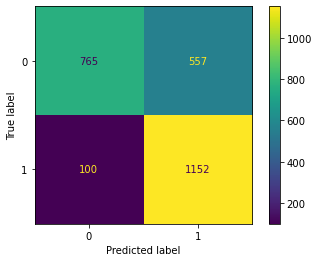

In [56]:
# Summarize the results
MLP_best = gsMLP.best_estimator_
print('Best : {}, using {}'.format(gsMLP.best_score_,gsMLP.best_params_))
report(gsMLP)

In [ ]:
#XGBooster

XGB = XGBClassifier()

xgb_param_grid = {"learning_rate"    : [0.01,0.1,0.2] ,
                  "max_depth"        : [6,8,9],
                  "gamma"            : [ 0.0, 0.1, 0.2],
                  "colsample_bytree" : [ 0.5,0.6 ] }

gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)

In [ ]:
# Summarize the results
XGB_Best = gsXGB.best_estimator_
print('Best : {}, using {}'.format(gsXGB.best_score_,gsXGB.best_params_))
report(gsXGB)

In [57]:
df1

,id,decimalLatitude,decimalLongitude,occurrenceStatus
0,0,-37.917146,145.207706,NaN
1,1,-37.750974,144.981501,NaN
2,2,-37.961600,145.348000,NaN
3,3,-37.621300,145.003000,NaN
4,4,-38.498100,145.647000,NaN
...,...,...,...,...
4046,4046,-31.884385,116.150192,NaN
4047,4047,-32.412962,115.779737,NaN
4048,4048,-32.147959,115.856628,NaN
4049,4049,-31.827000,116.238000,NaN


In [58]:
def join_frogs_sub(frogs, data):
    """Collects the data for each frog location and joins it onto the frog data 

    Arguments:
    frogs -- dataframe containing the response variable along with ["decimalLongitude", "decimalLatitude", "key"]
    data -- xarray dataarray of features, indexed with geocoordinates
    """
    return frogs.merge(
        (
            data
            .rename('data')
            .sel(
                x=xr.DataArray(df1.decimalLongitude, dims="id", coords={"id": df1.id}), 
                y=xr.DataArray(df1.decimalLatitude, dims="id", coords={"id": df1.id}),
                method="nearest"
            )
            .to_dataframe()
            .assign(val = lambda x: x.iloc[:, -1])
            [['val']]
            .reset_index()
            .drop_duplicates()
            .pivot(index="id", columns="band", values="val")
            .reset_index()
        ),
        on = ['id'],
        how = 'inner'
    )
    
test_data = join_frogs_sub(df1, weather_data)
test_data.head()

,id,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
0,0,-37.917146,145.207706,NaN,68.525000,64.925000,-0.265833,133.400000,80.541667,119.575000,229.908333,0.0,27.413335,16.155002,1.798167,0.977250
1,1,-37.750974,144.981501,NaN,68.525000,64.925000,-0.265833,133.400000,80.541667,119.575000,229.908333,0.0,27.413335,16.155002,1.798167,0.977250
2,2,-37.961600,145.348000,NaN,74.758333,56.858333,-0.588333,131.608333,92.391667,161.483333,229.075000,0.0,27.082502,16.005835,1.803000,0.925167
3,3,-37.621300,145.003000,NaN,68.525000,64.925000,-0.265833,133.400000,80.541667,119.575000,229.908333,0.0,27.413335,16.155002,1.798167,0.977250
4,4,-38.498100,145.647000,NaN,107.275000,15.000000,0.501667,122.241667,310.308333,403.983333,222.008333,0.0,26.177502,15.965001,1.893417,0.736167


In [59]:
data = test_data.iloc[:,-12:]
# define standard scaler
scaler = StandardScaler()
# transform data
test_Scaled = scaler.fit_transform(data)

In [60]:
test_Scaled

array([[-1.06767625,  1.08438054, -0.75807516, ..., -0.81092689,
        -0.93171492,  1.05973087],
       [-1.06767625,  1.08438054, -0.75807516, ..., -0.81092689,
        -0.93171492,  1.05973087],
       [-0.80213158,  0.75946619, -2.02994568, ..., -0.90036541,
        -0.90801335,  0.46876516],
       ...,
       [-1.06767625,  1.08438054, -0.75807516, ..., -0.81092689,
        -0.93171492,  1.05973087],
       [-1.06767625,  1.08438054, -0.75807516, ..., -0.81092689,
        -0.93171492,  1.05973087],
       [-1.06767625,  1.08438054, -0.75807516, ..., -0.81092689,
        -0.93171492,  1.05973087]])

In [61]:
def get_result(model,test_Scaled):
    test_result = model.predict(test_Scaled)
    df1.occurrenceStatus = test_result
    print(df1.occurrenceStatus.value_counts())
    

In [ ]:
get_result(gsLR, test_Scaled)

In [ ]:
get_result(gsRFC, test_Scaled)

get_result(gsExtC, test_Scaled)

In [ ]:
get_result(gsSVMC, test_Scaled)

In [63]:
get_result(gsMLP, test_Scaled)

0    2078
1    1973
Name: occurrenceStatus, dtype: int64


In [ ]:
get_result(gsXGB, test_Scaled)

In [64]:
df1.to_csv('gsMLP.csv')
